In [1]:
import pandas as pd

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive',force_remount=True)
mi_directorio = '/content/drive/My Drive/Master/Estadistica'
os.chdir(mi_directorio)

Mounted at /content/drive


In [3]:
df = pd.read_excel('ARCHIVODATOSEVALUACION24.xlsx')
df

,Grupo de control,Nivel glucosa basal,Nivel glucosa 60 min
0,1,90,136
1,1,82,151
2,1,80,148
3,1,75,138
4,1,74,141
...,...,...,...
60,2,95,169
61,2,99,172
62,2,98,173
63,2,84,188


In [65]:
print('MEDIDAS DE CENTRALIZACION Y DISPERSION')
medidas_por_grupo = df.groupby('Grupo de control')['Nivel glucosa basal'].describe()
print(medidas_por_grupo)
# Gracias a .descibe() obtenemos las medidas de centralizacion, media ('mean') y mediana (50%)
# Obtenemos tambien las de dispersion: desv tipica(std), rango (max-min), rec. intercuartilico (75% - 25%)
# Añado tambien las funciones para saber la varianza y el CV
print('VARIANZA')
varianza = df.groupby('Grupo de control')['Nivel glucosa basal'].var()
print(varianza)
print('CV')
cv = medidas_por_grupo['std']/medidas_por_grupo['mean']
print(cv)
#Esta ultima medida nos permite saber la representatividad de la media
#Al ser ambos CV menores a 0'3, diremos que la media es representativa

MEDIDAS DE CENTRALIZACION Y DISPERSION
                  count       mean       std   min   25%   50%    75%    max
Grupo de control                                                            
1                  35.0  85.028571  9.379219  65.0  78.5  82.0  90.50  104.0
2                  30.0  90.833333  8.461203  77.0  84.5  90.5  97.75  106.0
VARIANZA
Grupo de control
1    87.969748
2    71.591954
Name: Nivel glucosa basal, dtype: float64
CV
Grupo de control
1    0.110307
2    0.093151
dtype: float64


In [5]:
grupo_2 = df[df['Grupo de control'] == 2]

# Calcular la asimetría para el Grupo 2
simetria = grupo_2['Nivel glucosa basal'].skew()
print("Coeficiente asimetría para adultos:", simetria)

# Calcular la curtosis para el Grupo 2
curtosis = grupo_2['Nivel glucosa basal'].kurtosis()
print("Curtosis para adultos:", curtosis)

# El coeficiente de asimetria es negativo, la distribución es asimétrica negativa o asimétrica a la izquierda, aunque no mucho
# La curtosis tambien es negativa, la distribucion es platicúrtica (más
# aplanada de lo normal)


Coeficiente asimetría para adultos: -0.08006820966886752
Curtosis para adultos: -1.0258071550350931


In [6]:
grupo_1 = df[df['Grupo de control'] == 1]
cuartiles_glucosa_basal = grupo_1['Nivel glucosa basal'].quantile([0.25, 0.5, 0.75])
cuartiles_glucosa_60min = grupo_1['Nivel glucosa 60 min'].quantile([0.25, 0.5, 0.75])

# Imprimir los cuartiles
print("Cuartiles para el Nivel de Glucosa Basal (Grupo 1):")
print(cuartiles_glucosa_basal)
print("\nCuartiles para el Nivel de Glucosa a los 60 min (Grupo 1):")
print(cuartiles_glucosa_60min)

#Q1: el primer cuartil (25% de los datos están por debajo de este valor).
#Q2: la mediana o el segundo cuartil (50% de los datos están por debajo de este valor).
#Q3: el tercer cuartil (75% de los datos están por debajo de este valor)


Cuartiles para el Nivel de Glucosa Basal (Grupo 1):
0.25    78.5
0.50    82.0
0.75    90.5
Name: Nivel glucosa basal, dtype: float64

Cuartiles para el Nivel de Glucosa a los 60 min (Grupo 1):
0.25    141.0
0.50    148.0
0.75    153.0
Name: Nivel glucosa 60 min, dtype: float64


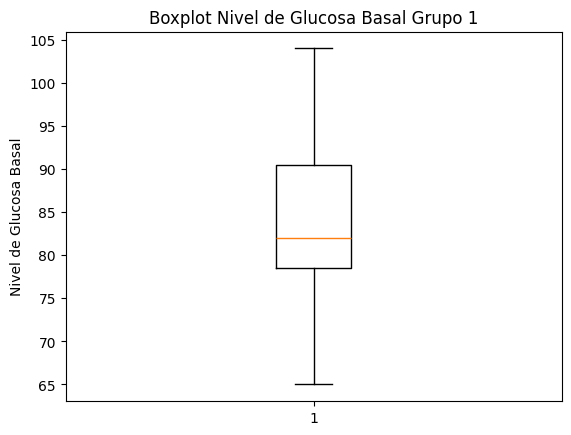

In [7]:
import matplotlib.pyplot as plt

plt.boxplot(grupo_1['Nivel glucosa basal'])
plt.title('Boxplot Nivel de Glucosa Basal Grupo 1')
plt.ylabel('Nivel de Glucosa Basal')
plt.show;
#Atendiendo al boxplot para el nivel basal, no encontramos ningun dato atipico


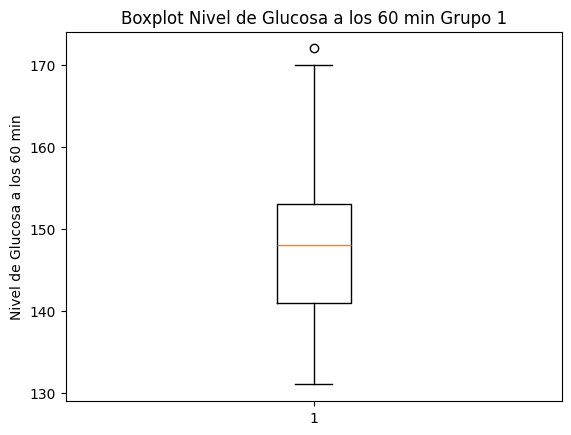

In [8]:
plt.boxplot(grupo_1['Nivel glucosa 60 min'])
plt.title('Boxplot Nivel de Glucosa a los 60 min Grupo 1')
plt.ylabel('Nivel de Glucosa a los 60 min')
plt.show;
#En el boxplot para el nivel a los 60 min, observamos un outlier, representado por un punto más allá del bigote superior (limite maximo)


In [9]:
import scipy.stats as stats

shapiro_grupo_1 = stats.shapiro(grupo_1['Nivel glucosa 60 min'])
shapiro_grupo_2 = stats.shapiro(grupo_2['Nivel glucosa 60 min'])

print(f"Prueba de Shapiro-Wilk - Grupo 1: Estadístico = {shapiro_grupo_1[0]}, p-value = {shapiro_grupo_1[1]}")
print(f"Prueba de Shapiro-Wilk - Grupo 2: Estadístico = {shapiro_grupo_2[0]}, p-value = {shapiro_grupo_2[1]}")

#Dado que la muestra no es muy grande, en primer lugar uso el Test de Shapiro-Wilk
#En ambos grupos el p-valor es >0'05, por lo que asumimos que ambas siguen una distribucion normal

Prueba de Shapiro-Wilk - Grupo 1: Estadístico = 0.9735987272599481, p-value = 0.5493438105627045
Prueba de Shapiro-Wilk - Grupo 2: Estadístico = 0.9659754286699488, p-value = 0.4356766397527704


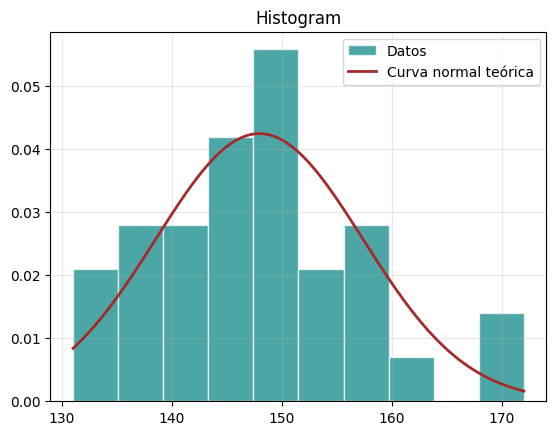

In [10]:
#Complementamos la prueba analítica con una prueba grafica
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
datos = grupo_1['Nivel glucosa 60 min']
plt.hist(datos, bins=10, density=True, color="teal", alpha=0.7, edgecolor="white", label="Datos")

x = np.linspace(min(datos), max(datos), 1000)
pdf = norm.pdf(x, np.mean(datos), np.std(datos))  # Curva normal con media y desviación estándar de los datos
plt.plot(x, pdf, color="brown", linewidth=2, label="Curva normal teórica")
plt.title("Histogram")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


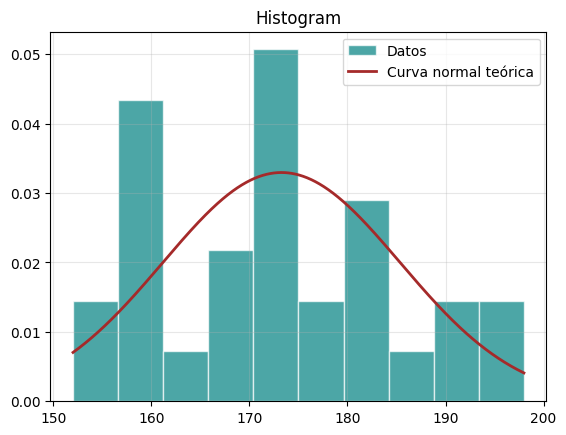

In [11]:
datos1 = grupo_2['Nivel glucosa 60 min']
plt.hist(datos1, bins=10, density=True, color="teal", alpha=0.7, edgecolor="white", label="Datos")
x = np.linspace(min(datos1), max(datos1), 1000)
pdf = norm.pdf(x, np.mean(datos1), np.std(datos1))  # Curva normal con media y desviación estándar de los datos
plt.plot(x, pdf, color="brown", linewidth=2, label="Curva normal teórica")
plt.title("Histogram")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#En ambos graficos observamos como el dibujo se aproxima a la curva de una distribucion normal

In [12]:
df1 = df[df['Grupo de control'] == 1]
df1['Nivel glucosa basal'].corr(df1['Nivel glucosa 60 min'])
#Creo un nuevo database con solo los datos del grupo 1
#Aplico una formula que me calcula el coeficiente de correlacion lineal entre las 2 variables de estudio
#La relacion lineal entre ellas es positiva y  de intensidad media-alta

0.6105394984279824

In [13]:
df1['Nivel glucosa basal'].cov(df1['Nivel glucosa 60 min'])
#Tambien se puede calcular la covarianza aunque tiene limites por la unidad de medida
#Cuanto mayor es la covarianza mayor es la relación lineal entre las variables
#Si dos variables estadísticamente dependientes crecen o decrecen en el mismo sentido la covarianza es positiva

54.67815126050419

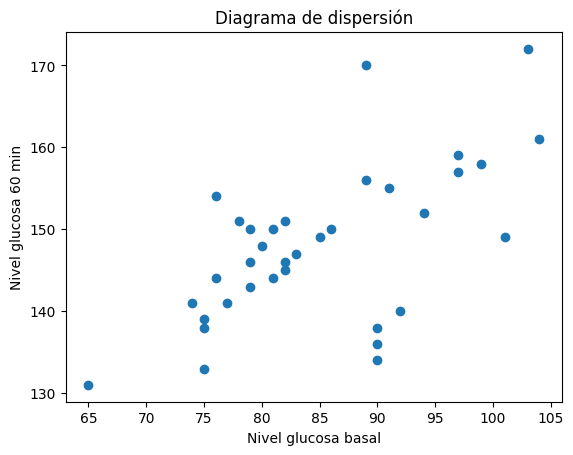

In [14]:
#Por ultimo, aplico un metodo grafico como los diagramas de dispersion
plt.scatter(df1['Nivel glucosa basal'], df1['Nivel glucosa 60 min'])
plt.title('Diagrama de dispersión')
plt.xlabel('Nivel glucosa basal')
plt.ylabel('Nivel glucosa 60 min')
plt.show()
#Apreciamos nuevamente una relacion lineal positiva y medianamente fuerte


In [66]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(df1[['Nivel glucosa basal']], df1['Nivel glucosa 60 min'])
print(f"Intercepto: {modelo.intercept_}")
print(f"Pendiente: {modelo.coef_[0]}")
#Con la libreria skicit learn obtenemos el modelo de regresion lineal
#Explica el nivel de glucosa a los 60 min en funcion del nivel de glucosa basal
#Mostramos la pendiente(coeficiente) y el intercepto del modelo

Intercepto: 95.09281265522905
Pendiente: 0.6215563027778842


In [67]:
nivel = [[83]]
glucosa_estimada = modelo.predict(nivel)
print (glucosa_estimada)
#La estimacion sustituye la x en el modelo por 83 y realiza el calculo y = 95'09 + 0'62*83
#Para un paciente joven cuyo nivel basal es 83 mg/Dl se estima que su nivel a los 60 min será 146,68 mg/Dl

[146.68198579]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
from sklearn.metrics import r2_score
r2 = modelo.score(df1[['Nivel glucosa basal']], df1['Nivel glucosa 60 min'])
porcentaje_no_explicado = (1 - r2) * 100

print(f"R² (porcentaje explicado): {r2 * 100:.2f}%")
print(f"Porcentaje no explicado por el modelo: {porcentaje_no_explicado:.2f}%")
#El r2 es bajo, hay un porcentaje de la variacion no explicada por el modelo elevado (62,72%)

R² (porcentaje explicado): 37.28%
Porcentaje no explicado por el modelo: 62.72%


In [69]:
pendiente = modelo.coef_[0]
incremento_nivel_basal = 5
incremento_glucosa_60min = pendiente * incremento_nivel_basal
print(f"Por cada aumento de 5 mg/dL en el nivel basal, la glucosa a los 60 minutos aumentará en {incremento_glucosa_60min:.2f} mg/dL")

Por cada aumento de 5 mg/dL en el nivel basal, la glucosa a los 60 minutos aumentará en 3.11 mg/dL


In [19]:
import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW
conf_interval_95 = DescrStatsW(df1['Nivel glucosa basal']).tconfint_mean()
print(conf_interval_95)
#Por defecto se calcula el IC al 95%. Como 88 esta dentro del intervalo, se puede afirmar
# que el nivel medio de glucosa en sangre en el momento de la ingestión en los jóvenes es 88 mg/Dl al 95%

(81.80669699675354, 88.2504458603893)


In [20]:
conf_interv_99 = DescrStatsW(df1['Nivel glucosa basal']).tconfint_mean(alpha=0.01)
print(conf_interv_99)
#Al 99% obtenemos la misma conclusion ya que tambien cae dentro del intervalo de confianza

(80.70303677421424, 89.35410608292861)


In [40]:
df2 = df[df['Grupo de control'] == 2]

import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(df2['Nivel glucosa basal']), sms.DescrStatsW(df1['Nivel glucosa basal']))
confidence_interval = cm.tconfint_diff(alpha=0.05, usevar='pooled')
confidence_interval
#Este intervalo de confianza no incluye el valor 0
#lo que indica que hay evidencia estadísticamente significativa para concluir que
#las medias de los niveles basales de glucosa entre adultos y jóvenes son diferentes al 95%.

(1.3457090144159904, 10.263814795107816)

In [59]:
from statsmodels.stats.proportion import proportion_confint
n = len(df)
casos = (df['Nivel glucosa basal'] > 95).sum()

# Intervalo de confianza al 98%
alpha = 0.02
ci_lower, ci_upper = proportion_confint(count=casos, nobs=n, alpha=alpha, method='normal')
print(f"Intervalo de confianza al 98%: ({ci_lower:.4f}, {ci_upper:.4f})")

Intervalo de confianza al 98%: (0.1347, 0.3883)


In [57]:
p_0 = 0.15  # Proporción bajo la hipótesis nula
from statsmodels.stats.proportion import proportions_ztest

# Contraste de hipótesis
z_statistic, p_value = proportions_ztest(count=casos, nobs=n, value=p_0, alternative='two-sided')

print(f"Estadístico Z: {z_statistic:.4f}")
print(f"p-valor: {p_value:.4f}")
#Como p-valor < alpha(0,05): rechazamos la hipotesis nula
#no puede afirmarse que la proporción de la población con glucosa superior a 95 mg/Dl es 0,15

Estadístico Z: 2.0462
p-valor: 0.0407


In [62]:
diferencias = df2['Nivel glucosa basal']- df2['Nivel glucosa 60 min']
import scipy.stats as stats
t_stat, p_value = stats.ttest_1samp(diferencias, 0)
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")
#El p-valor es minisculo, se rechaza la hipotesis nula de que la diferencia sea 0
# claramente hay una variación significativa del nivel de glucosa en sangre en el grupo de los adultos después de la toma

Estadístico t: -31.26650492643161
Valor p: 6.859810690337643e-24
